Testpunkt 1 (25.0, 32.0) klassificeras som: Pikachu | Rätt label: Pikachu
Testpunkt 2 (24.2, 31.5) klassificeras som: Pikachu | Rätt label: Pikachu
Testpunkt 3 (22.0, 34.0) klassificeras som: Pikachu | Rätt label: Pikachu
Testpunkt 4 (20.5, 34.0) klassificeras som: Pichu | Rätt label: Pichu

Accuracy: 100.00%


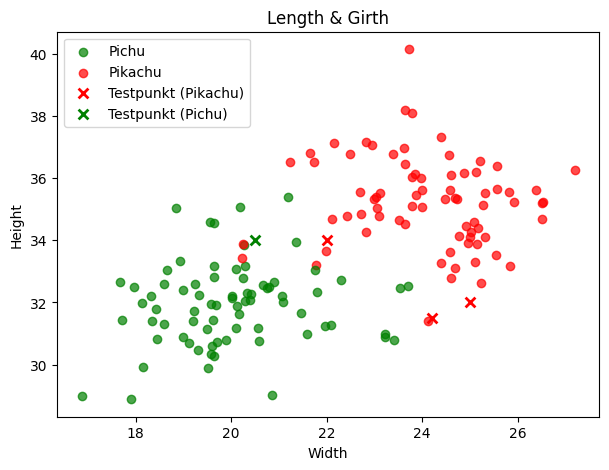

Testpunkt 1 (25.0, 32.0) klassificeras som: Pikachu | Rätt label: Pikachu
Testpunkt 2 (24.2, 31.5) klassificeras som: Pikachu | Rätt label: Pikachu
Testpunkt 3 (22.0, 34.0) klassificeras som: Pikachu | Rätt label: Pikachu
Testpunkt 4 (20.5, 34.0) klassificeras som: Pichu | Rätt label: Pichu

Accuracy: 100.00%


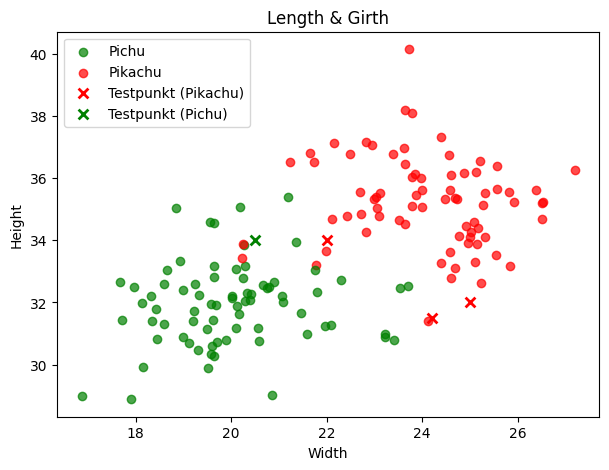

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

path_testpoints = "/mnt/c/Users/danie/OneDrive/Skrivbord/labb2/testpoints3.txt"
path_datapoints = "/mnt/c/Users/danie/OneDrive/Skrivbord/labb2/datapoints.txt"

def load_datapoints(path_datapoints):
    dpoints = []
    with open(path_datapoints) as lines:
        next(lines)                                      
        for line in lines:
            width, height, race = line.strip().split(",")
            dpoints.append((float(width), float(height), int(race)))
    return dpoints   

# Använder f här då det verkar som att variablerna i funktionen störs ut av ovan funktion.

def load_testpoints(path_testpoints):
    tpoints = []
    with open(path_testpoints) as f:
        next(f)                                      
        for line in f:
            width, height, race = line.strip().split(",")
            tpoints.append((float(width), float(height), int(race)))
    return tpoints  

def euclidean(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def classification_1NN(test_point, datapoints):
    closest_race = None
    minimum_dist = float("inf")
    for width, height, race in datapoints:
        d = euclidean(test_point, (width, height))   
        if d < minimum_dist:
            minimum_dist = d
            closest_race = race
    return closest_race

def classify_points(testpoints, datapoints):
    predictions = []
    correct = 0
    
    for i, (width, height, true_race) in enumerate(testpoints):
        predicted = classification_1NN((width, height), datapoints)
        predictions.append(predicted)
        
        if predicted == true_race:
            correct += 1
        
        print(f"Testpunkt {i+1} ({width}, {height}) klassificeras som:",
              "Pichu" if predicted == 0 else "Pikachu",
              "| Rätt label:", "Pichu" if true_race == 0 else "Pikachu")
    
    accuracy = correct / len(testpoints)
    print(f"\nAccuracy: {accuracy*100:.2f}%")
    return predictions, accuracy



def plot_training_and_test(training_data, testpoints, predictions):
   
    colors = ["green", "red"]  
    
    plt.figure(figsize=(7,5))
    plt.title("Length & Girth")
    plt.xlabel("Width")
    plt.ylabel("Height")
    
    # Plottar träningsdata

    for width, height, race in training_data:
        plt.scatter(width, height, color=colors[race], alpha=0.7, 
                    label="Pichu" if race==0 else "Pikachu")
    
    # Plottar testpunkter med predictions (kryss)

    for (width, height, _), pred in zip(testpoints, predictions):
        plt.scatter(width, height, color=colors[pred], marker="x", s=50, linewidth=2,
                    label="Testpunkt (Pichu)" if pred==0 else "Testpunkt (Pikachu)")
    
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()

# Ladda tränings- och testdata,  klassificerar testpunkterna med 1-NN, plotta träningsdata och testpunkter med predictions 

def run_classification(path_datapoints, path_testpoints):
  
    
    datapoints = load_datapoints(path_datapoints)
    testpoints = load_testpoints(path_testpoints)
    
    predictions, accuracy = classify_points(testpoints, datapoints) 
    
    plot_training_and_test(datapoints, testpoints, predictions)
    
    return predictions, accuracy

if __name__ == "__main__":
    run_classification(path_datapoints, path_testpoints)



#--------------------------------------------------------------------------------------------------------------------#

def user_input_classification(datapoints):
    """
    Låter användaren mata in en testpunkt och klassificerar den.
    Felhantering för negativa tal och icke-numeriska värden.
    """
    while True:
        try:
            width = float(input("Ange bredd (positivt tal): "))
            height = float(input("Ange höjd (positivt tal): "))
            
            if width < 0 or height < 0:
                print("Fel: Värdena måste vara positiva. Försök igen.")
                continue
            
            pred = classification_1NN((width, height), datapoints)
            print("Denna testpunkt klassificeras som:", "Pichu" if pred==0 else "Pikachu")
            break
        
        except ValueError:
            print("Fel: Ange numeriska värden. Försök igen.")

if __name__ == "__main__":
    datapoints = load_datapoints(path_datapoints)
    testpoints = load_testpoints(path_testpoints)
    
    predictions, accuracy = run_classification(path_datapoints, path_testpoints)
    
    # Låta användaren mata in en egen testpunkt
    user_input_classification(datapoints)